<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>17.- Feature Extraction</font>

<font color='steelblue'>Feature Extraction is the process related to dimensionality reduction (or dimension reduction) that creates a projection of the data (high-dimensional space) resulting in entirely new input features (low-dimensional space), so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform LDA-Dimensionality-Reduction</b>
- Evaluate a Naive Bayes model
- Explore the-change-model-performance-with-the-number-of-selected-components.
- Making-a-prediction-with-model-fit-on-data-after-applying-an-LDA-transform.
    
<font color='steelblue'><b>Perform PCA-Dimensionality-Reduction</b>	
- Evaluate a Logistic Regression model
- Explore the-change-model-performance-with-the-number-of-selected-components.
- Making-a-prediction-with-model-fit-on-data-after-applying-an-LDA-transform.
    
<font color='steelblue'><b>Perform SVD-Dimensionality-Reduction</b>	
- Evaluate a Logistic Regression model
- Explore the-change-model-performance-with-the-number-of-selected-components.
- Making-a-prediction-with-model-fit-on-data-after-applying-an-LDA-transform.

    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import numpy as np
import matplotlib.pyplot

## <font color='green'>Data Load</font>

In [4]:
current_path = os.getcwd()
path_origen = current_path
# Obtenemos el nombre del entorno que es el nombre del directorio raiz
raiz  = os.environ.get('CONDA_DEFAULT_ENV')
# Nos situamos en el directorio donde está el fichero (código) para carga de datos
os.chdir('C:\\' + raiz.__str__() + '\\CODE\\X - COMMON PROCEDURES\\')
# Ejecutamos el fichero
%run -i load_data.py
# No posicionamos de nuevo en el directorio origen
os.chdir(path_origen)
# Visualizamos el fichero cargado
data.head()

Uploaded File:
File name: diabetes.csv
File size:  (768, 9)
 
Generated Variables to use:
path_default: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\
path_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\
file_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\diabetes.csv
file_name: diabetes
Other variables: data, X, y, X_names, target(or y_name), target_index


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.model_selection import train_test_split
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1]
y = data_trans[:, -1]
# separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 20) (670,)
Test (330, 20) (330,)


## LDA Dimensionality Reduction

Use dataset as example: Multiclass_10

### Evaluating a Naive Bayes model

<font color='tomato'>Selecting number of components</font>

In [14]:
# Select number of components
number_components=5

<font color='darkgrey'><b>Operation</font>

In [18]:
# Evaluate LDA with naive bayes algorithm for classification
# NOTE: It can also be a good idea to standardize data prior 
# to performing the LDA transform
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=number_components)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: Mean=%.3f Std=%.3f' % (mean(n_scores), std(n_scores)))

Accuracy: Mean=0.314 Std=0.049


### Exploring the change model performance with the number of selected components.

<font color='tomato'>Selecting number of components</font>

In [19]:
# Select range of components
# LDA is limited in the number of components used in the dimensionality 
# reduction to between the number of classes minus one
# e.g. if num of class in Target=10, range=1..9
number_components_i=1
number_components_f=9


<font color='darkgrey'><b>Operation</font>

Num=1 Mean=0.182 Std=0.032
Num=2 Mean=0.235 Std=0.036
Num=3 Mean=0.267 Std=0.038
Num=4 Mean=0.303 Std=0.037
Num=5 Mean=0.314 Std=0.049
Num=6 Mean=0.314 Std=0.040
Num=7 Mean=0.329 Std=0.042
Num=8 Mean=0.343 Std=0.045
Num=9 Mean=0.358 Std=0.056


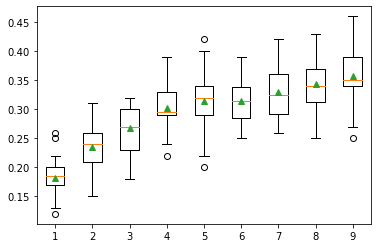

In [21]:
# compare lda number of components with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(number_components_i,number_components_f+1):
        steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('Num=%s Mean=%.3f Std=%.3f' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Making a prediction with model fit on data after applying an LDA transform.

<font color='tomato'>Selecting number of components</font>

In [24]:
# Select number of components
number_components=9

<font color='darkgrey'><b>Operation</font>

In [31]:
# make predictions using lda with naive bayes
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# define the model
steps = [('lda', LinearDiscriminantAnalysis(n_components=number_components)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_train, y_train)
yhat = model.predict(X_test)

Predicted Class: 8


In [34]:
# Accuracy of prediction
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,yhat)
print('Predicted Accuracy: %.2f' % (acc*100))

Predicted Accuracy: 35.76


## PCA Dimensionality Reduction

Use dataset as example: BinaryClass

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting number of components</font>

In [9]:
# Select number of components
number_components=10

<font color='darkgrey'><b>Operation</font>

In [10]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# define the pipeline
steps = [('pca', PCA(n_components=number_components)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.034)


### Exploring the change model performance with the number of selected components.

<font color='tomato'>Selecting number of components</font>

In [11]:
# Select range of components
number_components_i=1
number_components_f=20


<font color='darkgrey'><b>Operation</font>

>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


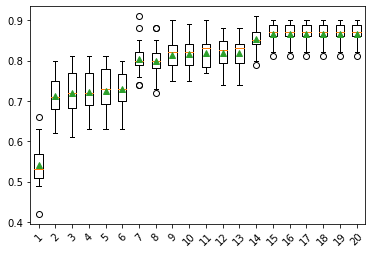

In [12]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(number_components_i, number_components_f+1):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

### Making a prediction with model fit on data after applying an LDA transform.

<font color='tomato'>Selecting number of components</font>

In [13]:
# Select number of components
number_components=15

<font color='darkgrey'><b>Operation</font>

In [14]:
# make predictions using pca with logistic regression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define the model
steps = [('pca', PCA(n_components=number_components)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [15]:
# Accuracy of prediction
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,yhat)
print('Predicted Accuracy: %.2f' % (acc*100))

Predicted Accuracy: 86.36


## SVD Dimensionality Reduction

Use dataset as example: BinaryClass

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting number of components</font>

In [16]:
# Select number of components
number_components=10

<font color='darkgrey'><b>Operation</font>

In [18]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=number_components)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.814 (0.034)


### Exploring the change model performance with the number of selected components.

<font color='tomato'>Selecting number of components</font>

In [16]:
# Select range of components
number_components_i=1
number_components_f=19 # max = Number of features - 1


<font color='darkgrey'><b>Operation</font>

>1 0.542 (0.046)
>2 0.626 (0.050)
>3 0.719 (0.053)
>4 0.722 (0.052)
>5 0.721 (0.054)
>6 0.729 (0.045)
>7 0.802 (0.034)
>8 0.800 (0.040)
>9 0.814 (0.037)
>10 0.814 (0.034)
>11 0.817 (0.037)
>12 0.820 (0.038)
>13 0.820 (0.036)
>14 0.825 (0.036)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)


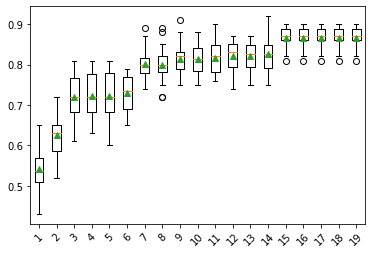

In [17]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(number_components_i, number_components_f+1):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

### Making a prediction with model fit on data after applying an LDA transform.

<font color='tomato'>Selecting number of components</font>

In [11]:
# Select number of components
number_components=15

<font color='darkgrey'><b>Operation</font>

In [14]:
# make predictions using pca with logistic regression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define the model
steps = [('svd', TruncatedSVD(n_components=number_components)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [15]:
# Accuracy of prediction
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,yhat)
print('Predicted Accuracy: %.2f' % (acc*100))

Predicted Accuracy: 86.36


## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 07
extension='_07'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
